<a href="https://colab.research.google.com/github/arvieira/bootcamp_modulo_01/blob/main/Notebook/ProjetoModulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ocorrências de Tráfego e o Impacto no Gasto da Saúde Pública
---
A mobilidade urbana com a utilização de veículos de compactos ou dos grandes modais urbanos envolvem riscos de acidentes. A concretização dessa probabilidade representada pelo risco se apresenta como uma ocorrência de tráfego (acidentes de trânsito). O primeiro atendimento a vítimas de ocorrências de tráfego é realizado pela saúde pública, de modo que tais acidentes impactam diretamente no gasto anual com a pasta. 

Levando em consideração os dados analisados no primeiro módulo do Bootcamp de Ciência de Dados, os quais tratavam sobre o gasto com atendimentos hospitalares, separados por unidade da federação e por mês/ano de atendimento ou processamento, restou a dúvida acerca da influência das ocorrências de tráfego em tais dados.


# Dados Utilizados e Objetivo
---
Este projeto apresenta a análise comparativa entre o dataset apresentado no módulo 01, mais precisamente aquele que apresenta os dados pela data de processamento e um segundo conjunto de dados acerca de ocorrências de tráfego.

Foi utilizado o sistema Tabnet pertencente ao DATASUS para a obtenção do conjunto de dados citado. Os seguintes passos foram utilizados:
* "Dados Consolidados AIH (RD), por local de internação, a partir de 2008"
* "Brasil por região ou unidade da federação"
* Linha: "Unidade da Federação"
* Coluna: "Ano/mês processamento"
* Conteúdo: "Valor Total"
* Seleções Disponíveis>Caráter de atendimento: "Outros tipos de acidentes de trânsito"

Cabe ressaltar, que os passos de 1 a 5 são semelhantes aos utilizados para a produção do dataset utilizado em aula no módulo 01. No entanto, o último ponto realiza justamente um filtro separando da primeira massa de dados, aqueles referentes a ocorrências de tráfego para uma análise mais precisa da sua influência, nas diferentes épocas do ano (festas, férias escolares etc).

---
# Importação, descrição e tratamento dos dados
---

In [214]:
gastos_acidentes = pd.read_csv(
    '/content/drive/MyDrive/Trabalho/CienciaDeDados/Bootcamp/Modulo01/Projeto/Dados/ValorAcidentesTransito.csv',
    encoding='ISO-8859-1',
    skiprows=4,
    skipfooter=12,
    sep=';',
    decimal=',',
    thousands='.',
    index_col = 0
)

gastos_acidentes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,6350.45,36007.43,5984.81,7715.54,1586.69,231.07,13347.75,17492.35,16142.53,19768.45,9441.71,2179.79,25421.79,29867.90,13662.48,12282.22,23801.11,31150.49,33202.58,36208.43,48280.92,25170.27,60989.65,27596.62,16714.84,33429.09,50119.65,27724.56,40921.22,146944.90,104957.05,114882.55,115419.84,60538.33,89489.92,73395.87,27776.12,34708.16,18979.92,2144.63,...,104543.26,147053.00,124137.33,98975.60,128052.56,87473.97,154956.08,162285.55,53742.05,153449.68,183734.50,82332.03,116876.68,127359.93,85314.89,54235.64,70999.42,24347.76,136744.38,189172.27,59037.86,85547.71,137952.75,46552.75,92799.97,46163.33,21895.64,12807.43,14650.90,13566.22,70764.06,118866.36,122247.19,150242.42,281969.11,212633.38,110326.67,122833.73,62978.68,11076899.50
12 Acre,-,538.12,835.35,209.35,227.88,1942.07,1066.16,613.92,1563.78,476.40,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,13741.42
13 Amazonas,3966.21,4079.07,2293.35,92093.17,2105.89,315.76,2543.04,-,38183.79,6741.14,182.47,-,114.44,-,-,-,-,329.25,223.33,266.10,-,-,-,-,-,-,-,-,-,-,-,-,-,398.66,-,-,-,-,-,223.33,...,-,-,-,-,208.25,-,664.29,-,165.99,-,-,-,-,-,-,-,-,-,-,405.15,-,-,-,-,215.33,-,-,-,-,-,-,-,-,-,-,-,-,-,-,156761.95
14 Roraima,-,-,-,-,-,390.74,-,-,-,-,-,-,-,-,-,-,-,-,-,-,199.33,-,-,-,398.66,199.33,-,-,-,-,199.33,199.33,-,398.66,398.66,-,-,-,199.33,597.99,...,-,-,-,-,-,-,-,-,-,-,-,-,738.42,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,10746.04
15 Pará,198087.27,64321.59,49655.84,30681.42,33153.08,38463.40,9570.07,34360.62,40573.68,57454.29,60388.73,60348.80,133749.20,77074.76,46846.77,23796.23,18602.83,23368.31,30570.18,72727.95,23872.28,28391.54,27270.51,29754.99,26116.84,21427.04,34322.01,18427.60,42826.02,23048.46,27741.46,31595.39,25081.38,44012.06,27992.89,39070.95,25447.35,18146.78,7361.47,75620.69,...,15872.14,36988.94,5071.06,5245.89,21346.48,6169.65,18323.74,26052.37,6899.53,10979.33,6552.30,3715.80,4072.11,3501.15,3654.54,5227.01,5491.06,5891.75,7766.49,30727.65,5809.02,16914.89,9102.51,4888.53,2771.22,3280.83,24721.23,4746.24,7556.44,2623.83,4162.84,25192.43,17063.28,10873.24,10972.32,7649.25,4422.17,3517.14,1515.26,4479371.60


In [215]:
# Exibição do formato do data set (linhas, colunas)
gastos_acidentes.shape

(27, 160)

In [216]:
# Informações sobre o dataset
gastos_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 160 entries, 2008/Jan to Total
dtypes: float64(1), object(159)
memory usage: 34.0+ KB


---
Como pode ser visto na saída dos métodos head() e info() acima, muitos estados não fornecem os dados ou o fazem de modo incompleto. Nesse caso, para a análise destes dados, será necessária a utilização de técnicas para completar os dados faltantes ou realizar seleções de trechos confiáveis do dataset.

Para tal, serão utilizadas as técnicas apresentadas na live de monitoria:

---

In [217]:
# Fazendo a limpeza dos dados, substituindo os traços por NaN
dados = gastos_acidentes.replace('-', np.nan)
dados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,6350.45,36007.43,5984.81,7715.54,1586.69,231.07,13347.75,17492.35,16142.53,19768.45,9441.71,2179.79,25421.79,29867.90,13662.48,12282.22,23801.11,31150.49,33202.58,36208.43,48280.92,25170.27,60989.65,27596.62,16714.84,33429.09,50119.65,27724.56,40921.22,146944.90,104957.05,114882.55,115419.84,60538.33,89489.92,73395.87,27776.12,34708.16,18979.92,2144.63,...,104543.26,147053.00,124137.33,98975.60,128052.56,87473.97,154956.08,162285.55,53742.05,153449.68,183734.50,82332.03,116876.68,127359.93,85314.89,54235.64,70999.42,24347.76,136744.38,189172.27,59037.86,85547.71,137952.75,46552.75,92799.97,46163.33,21895.64,12807.43,14650.90,13566.22,70764.06,118866.36,122247.19,150242.42,281969.11,212633.38,110326.67,122833.73,62978.68,11076899.50
12 Acre,NaN,538.12,835.35,209.35,227.88,1942.07,1066.16,613.92,1563.78,476.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13741.42
13 Amazonas,3966.21,4079.07,2293.35,92093.17,2105.89,315.76,2543.04,NaN,38183.79,6741.14,182.47,NaN,114.44,NaN,NaN,NaN,NaN,329.25,223.33,266.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398.66,NaN,NaN,NaN,NaN,NaN,223.33,...,NaN,NaN,NaN,NaN,208.25,NaN,664.29,NaN,165.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.15,NaN,NaN,NaN,NaN,215.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156761.95
14 Roraima,NaN,NaN,NaN,NaN,NaN,390.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.33,NaN,NaN,NaN,398.66,199.33,NaN,NaN,NaN,NaN,199.33,199.33,NaN,398.66,398.66,NaN,NaN,NaN,199.33,597.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10746.04
15 Pará,198087.27,64321.59,49655.84,30681.42,33153.08,38463.40,9570.07,34360.62,40573.68,57454.29,60388.73,60348.80,133749.20,77074.76,46846.77,23796.23,18602.83,23368.31,30570.18,72727.95,23872.28,28391.54,27270.51,29754.99,26116.84,21427.04,34322.01,18427.60,42826.02,23048.46,27741.46,31595.39,25081.38,44012.06,27992.89,39070.95,25447.35,18146.78,7361.47,75620.69,...,15872.14,36988.94,5071.06,5245.89,21346.48,6169.65,18323.74,26052.37,6899.53,10979.33,6552.30,3715.80,4072.11,3501.15,3654.54,5227.01,5491.06,5891.75,7766.49,30727.65,5809.02,16914.89,9102.51,4888.53,2771.22,3280.83,24721.23,4746.24,7556.44,2623.83,4162.84,25192.43,17063.28,10873.24,10972.32,7649.25,4422.17,3517.14,1515.26,4479371.60


In [218]:
# Os dados ainda são objetos
dados.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 2008/Jan to Total
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11 Rondônia             159 non-null    object
 1   12 Acre                 12 non-null     object
 2   13 Amazonas             25 non-null     object
 3   14 Roraima              33 non-null     object
 4   15 Pará                 160 non-null    object
 5   16 Amapá                7 non-null      object
 6   17 Tocantins            155 non-null    object
 7   21 Maranhão             128 non-null    object
 8   22 Piauí                107 non-null    object
 9   23 Ceará                160 non-null    object
 10  24 Rio Grande do Norte  158 non-null    object
 11  25 Paraíba              160 non-null    object
 12  26 Pernambuco           141 non-null    object
 13  27 Alagoas              159 non-null    object
 14  28 Sergipe              20 non-null     object
 15  29

In [219]:
# Passando os dados para float64
dados = dados.astype('float64')
dados.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 2008/Jan to Total
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   11 Rondônia             159 non-null    float64
 1   12 Acre                 12 non-null     float64
 2   13 Amazonas             25 non-null     float64
 3   14 Roraima              33 non-null     float64
 4   15 Pará                 160 non-null    float64
 5   16 Amapá                7 non-null      float64
 6   17 Tocantins            155 non-null    float64
 7   21 Maranhão             128 non-null    float64
 8   22 Piauí                107 non-null    float64
 9   23 Ceará                160 non-null    float64
 10  24 Rio Grande do Norte  158 non-null    float64
 11  25 Paraíba              160 non-null    float64
 12  26 Pernambuco           141 non-null    float64
 13  27 Alagoas              159 non-null    float64
 14  28 Sergipe              20 non-null   

In [220]:
# Contagem de valores nulos no dataset
dados.isnull().sum().sum()

962

In [221]:
# Porcentagem da tabela que não se encontra preenchida
total_de_elementos = dados.shape[0] * dados.shape[1]
elementos_nulos = dados.isnull().sum().sum()
porcentagem_de_falta_de_dados = (100*elementos_nulos)/total_de_elementos
porcentagem_de_falta_de_dados

22.26851851851852

--- 
Como pode ser visto, aproximadamente 22,27% da tabela não está preenchida, o que é uma porcentagem relativamente alta para se comparar cegamente ou realizar a substituição dos NaN por zero. Caso fosse substituído por zero, o impacto nos gastos com saúde pública que se deseja avaliar ficaria muito menor do que o real.

Logo, teremos que avaliar como se dá a ocorrência dos NaN pelas diferentes unidades da federação. Para isso, contaremos linha por linha a quantidade de NaN que os estados possuem.

---

In [222]:
# Contagem de valores NaN por unidade da federação
# O total possível é de 160
dados.T.isnull().sum()

Unidade da Federação
11 Rondônia                 1
12 Acre                   148
13 Amazonas               135
14 Roraima                127
15 Pará                     0
16 Amapá                  153
17 Tocantins                5
21 Maranhão                32
22 Piauí                   53
23 Ceará                    0
24 Rio Grande do Norte      2
25 Paraíba                  0
26 Pernambuco              19
27 Alagoas                  1
28 Sergipe                140
29 Bahia                    0
31 Minas Gerais             0
32 Espírito Santo           0
33 Rio de Janeiro           2
35 São Paulo                0
41 Paraná                   0
42 Santa Catarina           0
43 Rio Grande do Sul        1
50 Mato Grosso do Sul      83
51 Mato Grosso              1
52 Goiás                   59
53 Distrito Federal         0
dtype: int64

In [223]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['11 Rondônia'][dados.loc['11 Rondônia'].isna()]

2011/Jun   nan
Name: 11 Rondônia, dtype: float64

In [224]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['17 Tocantins'][dados.loc['17 Tocantins'].isna()]

2020/Nov   nan
2020/Dez   nan
2021/Jan   nan
2021/Fev   nan
2021/Mar   nan
Name: 17 Tocantins, dtype: float64

In [225]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['24 Rio Grande do Norte'][dados.loc['24 Rio Grande do Norte'].isna()]

2011/Mar   nan
2011/Mai   nan
Name: 24 Rio Grande do Norte, dtype: float64

In [226]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['27 Alagoas'][dados.loc['27 Alagoas'].isna()]

2009/Jan   nan
Name: 27 Alagoas, dtype: float64

In [227]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['33 Rio de Janeiro'][dados.loc['33 Rio de Janeiro'].isna()]

2021/Fev   nan
2021/Mar   nan
Name: 33 Rio de Janeiro, dtype: float64

In [228]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['43 Rio Grande do Sul'][dados.loc['43 Rio Grande do Sul'].isna()]

2021/Mar   nan
Name: 43 Rio Grande do Sul, dtype: float64

In [229]:
# Identificação dos meses faltantens do estado com menos de 10 lapsos
dados.loc['51 Mato Grosso'][dados.loc['51 Mato Grosso'].isna()]

2010/Mai   nan
Name: 51 Mato Grosso, dtype: float64

In [230]:
# Cortando os 5 últimos meses e o total
dados_cortados = dados.T[:-6].T
dados_cortados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,6350.45,36007.43,5984.81,7715.54,1586.69,231.07,13347.75,17492.35,16142.53,19768.45,9441.71,2179.79,25421.79,29867.90,13662.48,12282.22,23801.11,31150.49,33202.58,36208.43,48280.92,25170.27,60989.65,27596.62,16714.84,33429.09,50119.65,27724.56,40921.22,146944.90,104957.05,114882.55,115419.84,60538.33,89489.92,73395.87,27776.12,34708.16,18979.92,2144.63,...,56359.43,83681.11,71990.70,117284.13,178382.70,101422.77,104543.26,147053.00,124137.33,98975.60,128052.56,87473.97,154956.08,162285.55,53742.05,153449.68,183734.50,82332.03,116876.68,127359.93,85314.89,54235.64,70999.42,24347.76,136744.38,189172.27,59037.86,85547.71,137952.75,46552.75,92799.97,46163.33,21895.64,12807.43,14650.90,13566.22,70764.06,118866.36,122247.19,150242.42
12 Acre,nan,538.12,835.35,209.35,227.88,1942.07,1066.16,613.92,1563.78,476.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
13 Amazonas,3966.21,4079.07,2293.35,92093.17,2105.89,315.76,2543.04,nan,38183.79,6741.14,182.47,nan,114.44,nan,nan,nan,nan,329.25,223.33,266.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,398.66,nan,nan,nan,nan,nan,223.33,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,208.25,nan,664.29,nan,165.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,405.15,nan,nan,nan,nan,215.33,nan,nan,nan,nan,nan,nan,nan,nan,nan
14 Roraima,nan,nan,nan,nan,nan,390.74,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,199.33,nan,nan,nan,398.66,199.33,nan,nan,nan,nan,199.33,199.33,nan,398.66,398.66,nan,nan,nan,199.33,597.99,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,738.42,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
15 Pará,198087.27,64321.59,49655.84,30681.42,33153.08,38463.40,9570.07,34360.62,40573.68,57454.29,60388.73,60348.80,133749.20,77074.76,46846.77,23796.23,18602.83,23368.31,30570.18,72727.95,23872.28,28391.54,27270.51,29754.99,26116.84,21427.04,34322.01,18427.60,42826.02,23048.46,27741.46,31595.39,25081.38,44012.06,27992.89,39070.95,25447.35,18146.78,7361.47,75620.69,...,8729.82,22507.87,12241.42,8737.01,11246.15,6396.16,15872.14,36988.94,5071.06,5245.89,21346.48,6169.65,18323.74,26052.37,6899.53,10979.33,6552.30,3715.80,4072.11,3501.15,3654.54,5227.01,5491.06,5891.75,7766.49,30727.65,5809.02,16914.89,9102.51,4888.53,2771.22,3280.83,24721.23,4746.24,7556.44,2623.83,4162.84,25192.43,17063.28,10873.24


---
As análises anteriores tiveram o objetivo de procurar os meses com falta de dados nas unidades da federação que tivessem até 10 itens faltantes. Foi observado que eliminando os dados a partir de novembro de 2020, será possível utilizar mais 3 estados: Tocantins, Rio de Janeiro e Rio Grande do Sul.

No atual momento, se tem 10 estados com todo o dataset completo e outros 3 que poderão ser utilizados com a eliminação dos dados a partir de Nov/2020. Cabe ressaltar, que a eliminação proposta representa remover os 5 últimos meses da série temporal, o que não causa impacto relevante nas análises dos dados perante o total de 160 meses disponíveis.

Os estados de Rondônia, Rio Grande do Norte, Alagoas e Mato Grosso apresentam a falta de apenas 1 ou 2 meses, de modo que a seguir será realizada uma tentativa de se preencher os lapsos na série temporal, com a utilização das técnicas apresentadas na Live de monitoria.

---

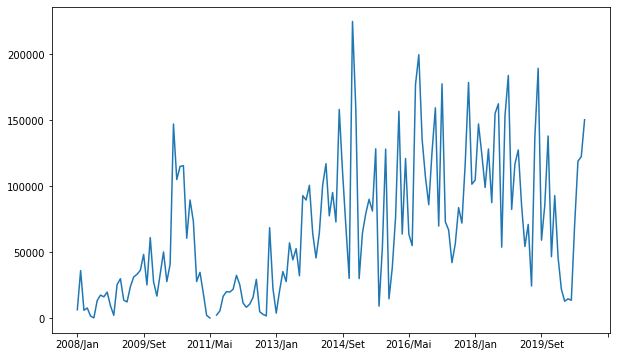

In [231]:
# Plotando o gráfico para verificar a posição do NaN
dados_cortados.loc['11 Rondônia'].plot(figsize=(10,6))

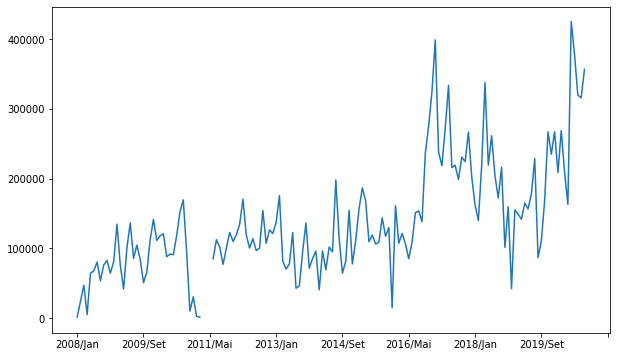

In [232]:
# Plotando o gráfico para verificar a posição do NaN
dados_cortados.loc['24 Rio Grande do Norte'].plot(figsize=(10,6))

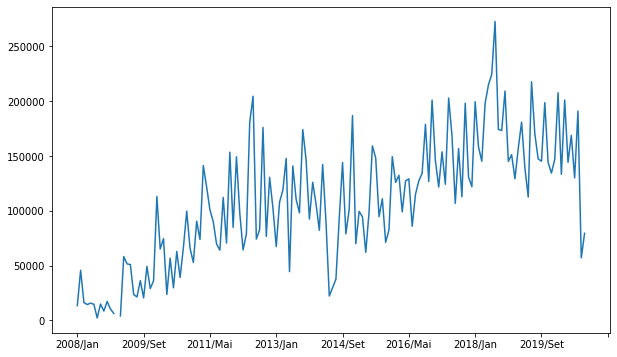

In [233]:
# Plotando o gráfico para verificar a posição do NaN
dados_cortados.loc['27 Alagoas'].plot(figsize=(10,6))

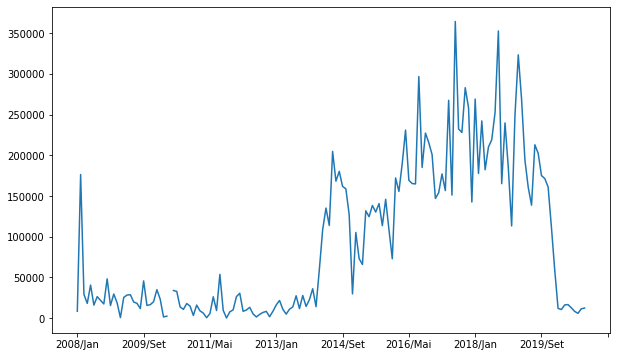

In [234]:
# Plotando o gráfico para verificar a posição do NaN
dados_cortados.loc['51 Mato Grosso'].plot(figsize=(10,6))

---
Os gráficos acima mostram uma grande variação mensal nos valores, de modo que não será utilizada a técnica de backfill para o preenchimento dos dados. Foram identificados períodos que o gráfico oscila em torno de valores pequenos, enquanto em momentos posteriores essa oscilação está próxima de valores maiores. Logo, a média do dataset também não foi escolhida como forma de preenchimento.

A solução escolhida para o preenchimento dos lapsos de dados foi a  interpolação linear. Esse tipo de procedimento calcula uma reta que ligaria os pontos à margem do lapso, preenchendo-o com o valor por onde essa reta passaria. Os resultados são apresentados nos gráficos a seguir.

---

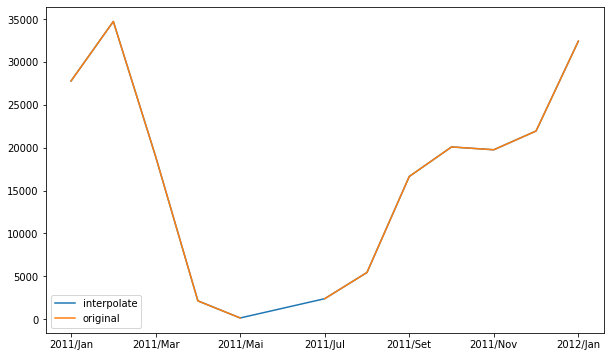

In [235]:
# Exibindo gráfico interpolado com zoom na área preenchida
dados_cortados.loc['11 Rondônia', '2011/Jan':'2012/Jan'].interpolate().plot(figsize=(10,6))
dados_cortados.loc['11 Rondônia', '2011/Jan':'2012/Jan'].plot()
plt.legend(['interpolate', 'original'])

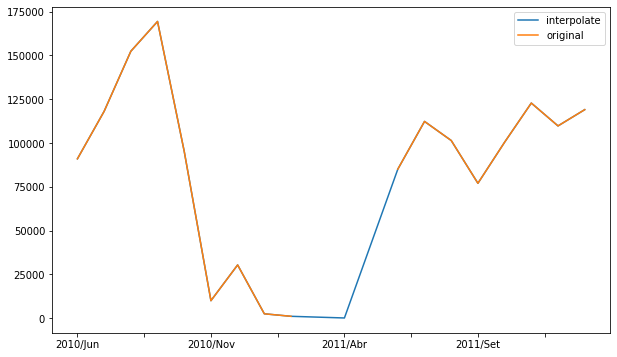

In [236]:
# Exibindo gráfico interpolado
dados_cortados.loc['24 Rio Grande do Norte', '2010/Jun':'2012/Jan'].interpolate().plot(figsize=(10,6))
dados_cortados.loc['24 Rio Grande do Norte', '2010/Jun':'2012/Jan'].plot()
plt.legend(['interpolate', 'original'])

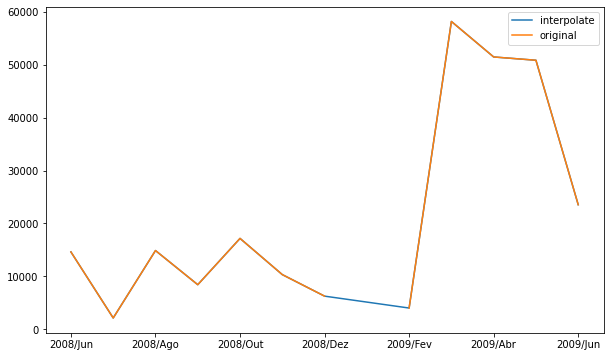

In [237]:
# Exibindo gráfico interpolado
dados_cortados.loc['27 Alagoas', '2008/Jun':'2009/Jun'].interpolate().plot(figsize=(10,6))
dados_cortados.loc['27 Alagoas', '2008/Jun':'2009/Jun'].plot()
plt.legend(['interpolate', 'original'])

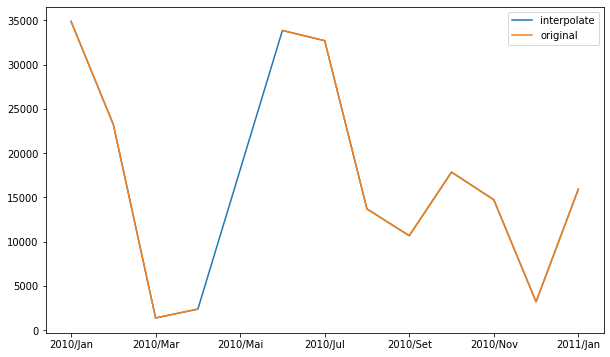

In [238]:
# Exibindo gráfico interpolado
dados_cortados.loc['51 Mato Grosso', '2010/Jan':'2011/Jan'].interpolate().plot(figsize=(10,6))
dados_cortados.loc['51 Mato Grosso', '2010/Jan':'2011/Jan'].plot()
plt.legend(['interpolate', 'original'])

In [239]:
# Preenchendo os dados com as interpolações indicadas
dados_preenchidos = dados_cortados
dados_preenchidos.loc['11 Rondônia'] = dados_cortados.loc['51 Mato Grosso'].interpolate()
dados_preenchidos.loc['24 Rio Grande do Norte'] = dados_cortados.loc['51 Mato Grosso'].interpolate()
dados_preenchidos.loc['27 Alagoas'] = dados_cortados.loc['51 Mato Grosso'].interpolate()
dados_preenchidos.loc['51 Mato Grosso'] = dados_cortados.loc['51 Mato Grosso'].interpolate()
dados_preenchidos.loc[[
                      '15 Pará', 
                      '23 Ceará', 
                      '25 Paraíba', 
                      '29 Bahia', 
                      '31 Minas Gerais', 
                      '32 Espírito Santo', 
                      '35 São Paulo', 
                      '41 Paraná', 
                      '42 Santa Catarina', 
                      '53 Distrito Federal', 
                      '17 Tocantins',
                      '33 Rio de Janeiro',
                      '43 Rio Grande do Sul',
                      '11 Rondônia', 
                      '24 Rio Grande do Norte', 
                      '27 Alagoas', 
                      '51 Mato Grosso'
]].isna().sum().sum()

0

In [240]:
# Gerando um dataset com os dados selecionados
dados_selecionados = dados_preenchidos.loc[[
                      '15 Pará', 
                      '23 Ceará', 
                      '25 Paraíba', 
                      '29 Bahia', 
                      '31 Minas Gerais', 
                      '32 Espírito Santo', 
                      '35 São Paulo', 
                      '41 Paraná', 
                      '42 Santa Catarina', 
                      '53 Distrito Federal', 
                      '17 Tocantins',
                      '33 Rio de Janeiro',
                      '43 Rio Grande do Sul',
                      '11 Rondônia', 
                      '24 Rio Grande do Norte', 
                      '27 Alagoas', 
                      '51 Mato Grosso'
]]
dados_selecionados.shape

(17, 154)

---
Temos um dataset contendo o valor gasto na saúde pública em virtude de ocorrências de tráfego sem lapsos de dados. Esta base contem o período de janeiro de 2008 até outubro de 2020 e abrange 17 unidades da federação:
* Pará
* Ceará
* Paraíba
* Bahia 
* Minas Gerais
* Espírito Santo
* São Paulo
* Paraná
* Santa Catarina
* Distrito Federal
* Tocantins
* Rio de Janeiro
* Rio Grande do Sul
* Rondônia
* Rio Grande do Norte
* Alagoas
* Mato Grosso

A seguir, será feita a importação da base de dados utilizada no módulo 01 do Bootcamp de Ciências de Dados, o qual possui o valor total gasto com saúde pública pelas unidades da federação. Essa base apersenta os dados por mês/ano de processamento, assim como a base de ocorrência de tráfego que vem sendo trabalhada.

---

In [241]:
# Importação da base de totais
gastos_totais = pd.read_csv(
    '/content/drive/MyDrive/Trabalho/CienciaDeDados/Bootcamp/Modulo01/Projeto/Dados/ValorTotal.csv',
    encoding='ISO-8859-1',
    skiprows=3,
    skipfooter=12,
    sep=';',
    decimal=',',
    thousands='.',
    index_col=0
)
gastos_totais.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,291

In [242]:
# Realizando cortes para as mesmas unidades da federação e o mesmo período de tempo
pd.options.display.float_format = "{:.2f}".format
totais_cortados = gastos_totais.T[:-6].T
totais_cortados = totais_cortados.loc[[
                    '15 Pará', 
                    '23 Ceará', 
                    '25 Paraíba', 
                    '29 Bahia', 
                    '31 Minas Gerais', 
                    '32 Espírito Santo', 
                    '35 São Paulo', 
                    '41 Paraná', 
                    '42 Santa Catarina', 
                    '53 Distrito Federal', 
                    '17 Tocantins',
                    '33 Rio de Janeiro',
                    '43 Rio Grande do Sul',
                    '11 Rondônia', 
                    '24 Rio Grande do Norte', 
                    '27 Alagoas', 
                    '51 Mato Grosso'
]].astype('float64')
totais_cortados.shape

(17, 154)

---
Com as duas bases de dados prontas para a comparação (dados_selecionados e totais_cortados), primeiro serão analisados os dados referentes ao estado do Rio de Janeiro a título de exemplo. Após essa análise, será selecionado um estado que tinha todos os dados de ocorrências de tráfego preenchidos na tabela inicial. Essas duas escolhas foram feitas com o intuito de se avaliar a influência dos acidentes no gasto total com a utilização de dados do meu estado e de um segundo dito confiável por ter preenchido corretamente todas as datas.

A metodologia de análise consiste nos seguintes passos:
* Junção da tabela de valores para acidentes e gastos totais
* Construção do gráfico dos dois tipos de valores juntos
* Verificação da proporcionalidade entre o total de gastos e os gastos com acidentes
* Comparação do passo anterior com o gráfico somente de acidentes
* Construção de um gráfico do tipo ScatterPlot das duas variáveis anteriores com linha de tendência

---

---
# Análise para Rio de Janeiro

---

In [243]:
# Juntando os valores de acidentes e o de totais da cidade do Rio de Janeiro em
# um mesmo dataframe para poder plotar

# Poderia substituir o código abaixo pelo comentário, mas assim ficou mais 
# explicativo
# pd.merge (totais_cortados.loc['33 Rio de Janeiro'].astype('float64'), dados_selecionados.loc['33 Rio de Janeiro'], left_index=True, right_index=True)
rio_de_janeiro = pd.DataFrame()
rio_de_janeiro['Acidentes'] = dados_selecionados.loc['33 Rio de Janeiro']
rio_de_janeiro['Total'] = totais_cortados.loc['33 Rio de Janeiro']
rio_de_janeiro

,Acidentes,Total
2008/Jan,120139.08,23025258.52
2008/Fev,152032.54,28394310.93
2008/Mar,176264.01,44567062.94
2008/Abr,122826.33,44054604.82
2008/Mai,208941.65,44911021.15
...,...,...
2020/Jun,148511.39,91735358.99
2020/Jul,161127.67,99331352.01
2020/Ago,98224.08,96339615.99
2020/Set,119910.00,88305239.94


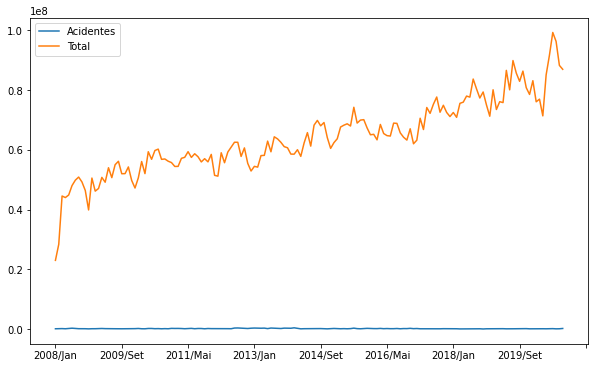

In [244]:
# Plotando o gráfico do Rio de Janeiro
# Não foi possível visualizar a curva de acidentes porque ela é muito menor que
# o gráfico de totais
rio_de_janeiro.plot(figsize=(10,6))

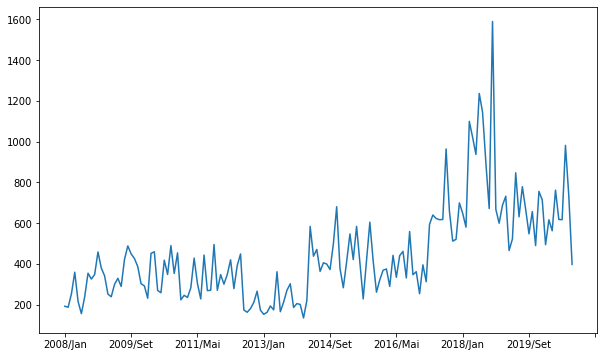

In [245]:
# Plotando o gráfico que indica quantas vezes o total é maior que os dados de
# acidentes
correlacionado = rio_de_janeiro['Total']/rio_de_janeiro['Acidentes']
correlacionado.plot(figsize=(10,6))

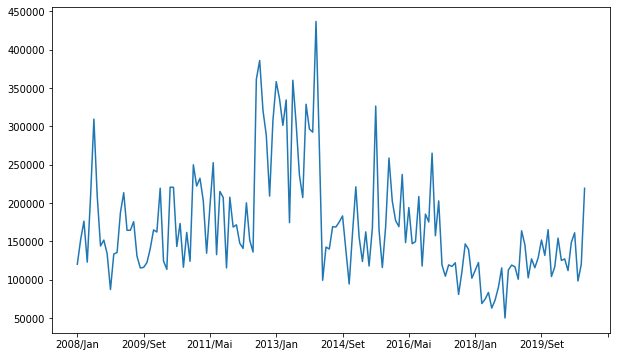

In [246]:
# Gráfico de acidentes do Rio de Janeiro para comparar com a evolução do anterior
rio_de_janeiro['Acidentes'].plot(figsize=(10,6))

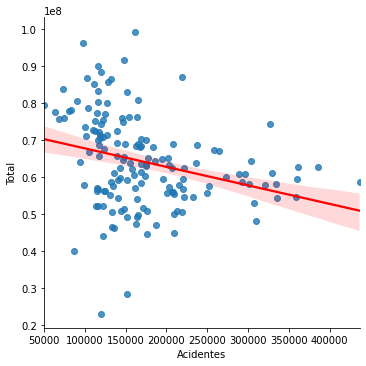

In [247]:
# Correlação de acidentes e o total
sns.lmplot(x='Acidentes', y='Total', data=rio_de_janeiro, line_kws={'color': 'red'})

---
# Análise para São Paulo

---

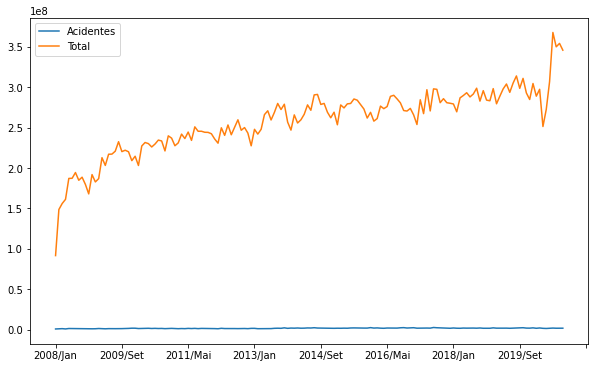

In [248]:
# Mesmo pensamento sendo aplicado para São Paulo
sao_paulo = pd.DataFrame()
sao_paulo['Acidentes'] = dados_selecionados.loc['35 São Paulo']
sao_paulo['Total'] = totais_cortados.loc['35 São Paulo']
sao_paulo.plot(figsize=(10,6))

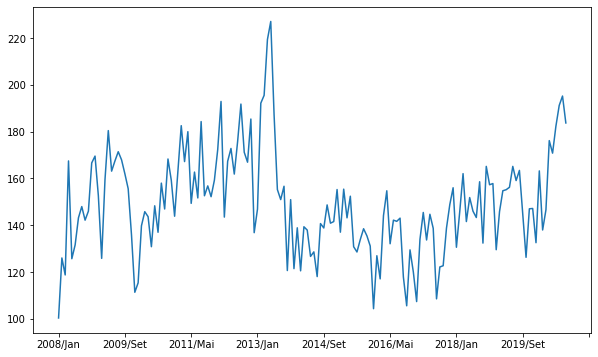

In [249]:
# Vendo a proporcionalidade
(sao_paulo['Total']/sao_paulo['Acidentes']).plot(figsize=(10,6))

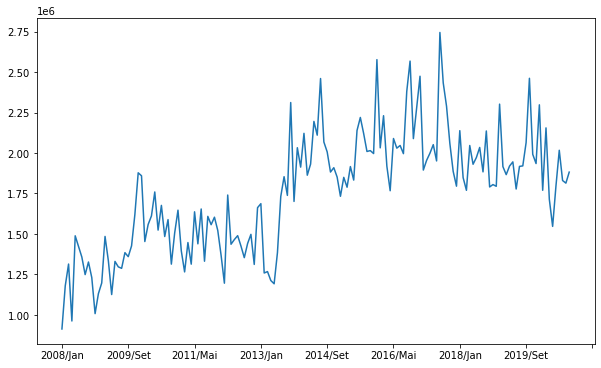

In [250]:
# Apresentando os acidentes para comparar com o anterior
sao_paulo['Acidentes'].plot(figsize=(10,6))

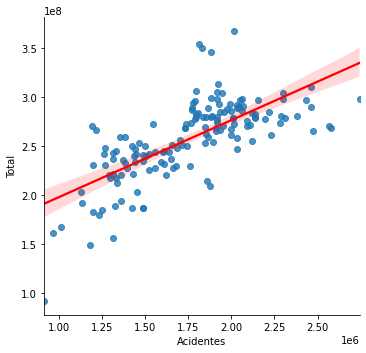

In [251]:
# Vendo a tendência da correlação
sns.lmplot(x='Acidentes', y='Total', data=sao_paulo, line_kws={'color': 'red'})

---
Os resultados dos gráficos anteriores mostraram linhas de tendência contrárias, de modo que isso pode ter sido gerado pelo fornecimento de dados de maneira errada ou incompleta pelos estados. Um estado pode não classificar adequadamente os dados em determinados meses e estes aumentarem o total sem aumentarem a quantidade de gastos com acidentes.

Para a análise mais completa disso, a seguir, serão construídos os gráficos de proporcionalidade e correlação com linhas de tendência de todas as unidades da federação em uma tabela com variação de cor pelos estados.

---

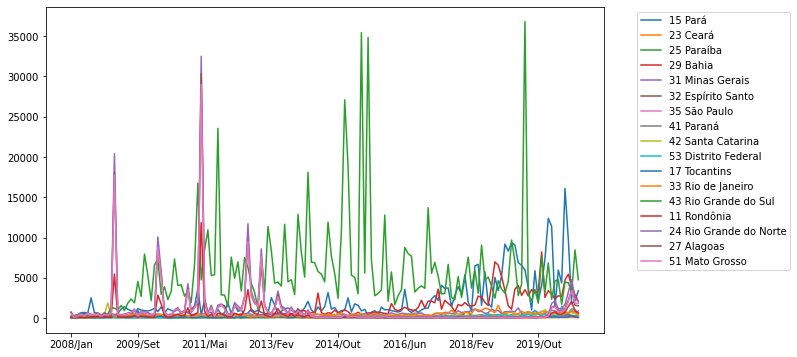

In [255]:
# Construindo gráficos proporcionais juntos em um mesmo gráfico
# Não é o mais adequado, mas serve para se ter uma noção de escala de gastos 
# entre os estados.
# Esses gráficos serão construídos individualmente a seguir.
proporcionais = totais_cortados/dados_selecionados
proporcionais = proporcionais.T.drop(proporcionais.columns[45]).T
proporcionais.T.plot(figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

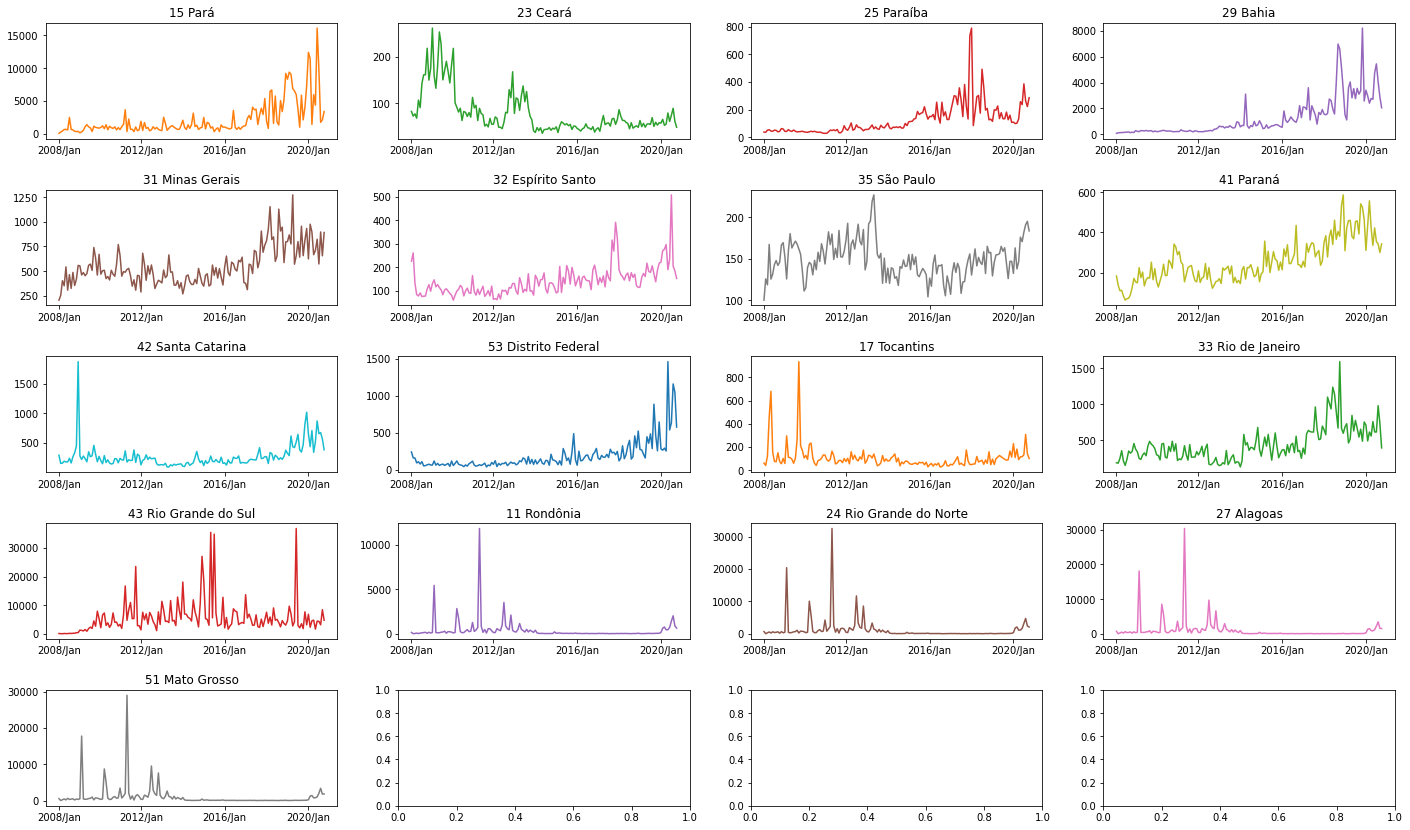

In [256]:
# Construindo gráficos de proporções entre o gasto total e referente a
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(20,12)
fig.tight_layout(pad=3.0)

x = 0
y = 0
color = 1
for estado in proporcionais.T.columns:
  axs[x, y].plot(proporcionais.loc[estado], 'C' + str(color))
  axs[x, y].set_title(estado)
  axs[x, y].set_xticks(['2008/Jan', '2012/Jan', '2016/Jan', '2020/Jan'])
  color += 1
  y += 1
  if y > 3:
    y = 0
    x += 1

plt.show()

In [252]:
# Montando uma tabela para plotar as correlações de todas as unidades
unidades = []
acidentes_valor = []
total_valor = []
mes_ano = pd.Index([])

# Código para remover algum estado se for necessário
# dados_selecionados = dados_selecionados.drop('35 São Paulo', axis=0)
# totais_cortados = totais_cortados.drop('35 São Paulo', axis=0)

for estado in dados_selecionados.T.columns:
  mes_ano = mes_ano.append(dados_selecionados.columns)
  for line in dados_selecionados.loc[estado]:
    unidades.append(estado)
    acidentes_valor.append(line)

for estado in dados_selecionados.T.columns:
  for line in totais_cortados.loc[estado]:
    total_valor.append(line)

data = {
    'Unidade da Federação': unidades, 
    'Mês/Ano': mes_ano, 
    'Acidentes': acidentes_valor,
    'Total': total_valor
    }

resultado = pd.DataFrame(data)
resultado

,Unidade da Federação,Mês/Ano,Acidentes,Total
0,15 Pará,2008/Jan,198087.27,18864744.11
1,15 Pará,2008/Fev,64321.59,19553758.20
2,15 Pará,2008/Mar,49655.84,21937342.70
3,15 Pará,2008/Abr,30681.42,20842829.69
4,15 Pará,2008/Mai,33153.08,23249952.88
...,...,...,...,...
2613,51 Mato Grosso,2020/Jun,12600.82,13215428.53
2614,51 Mato Grosso,2020/Jul,8226.07,16834650.98
2615,51 Mato Grosso,2020/Ago,5769.31,19704915.36
2616,51 Mato Grosso,2020/Set,11349.10,20746227.60


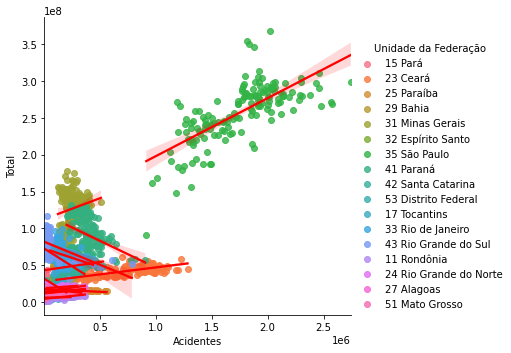

In [253]:
# Construindo gráficos de correlação juntos em um mesmo gráfico
# Não é o mais adequado, mas serve para se ter uma noção de escala de gastos 
# entre os estados. Se pode ver que São Paulo tem um gasto muito maior com 
# saúde pública e com acidentes de tráfego.
# Esses gráficos serão construídos individualmente a seguir.
sns.lmplot(data=resultado, x='Acidentes', y='Total', line_kws={'color':'red'}, hue='Unidade da Federação')

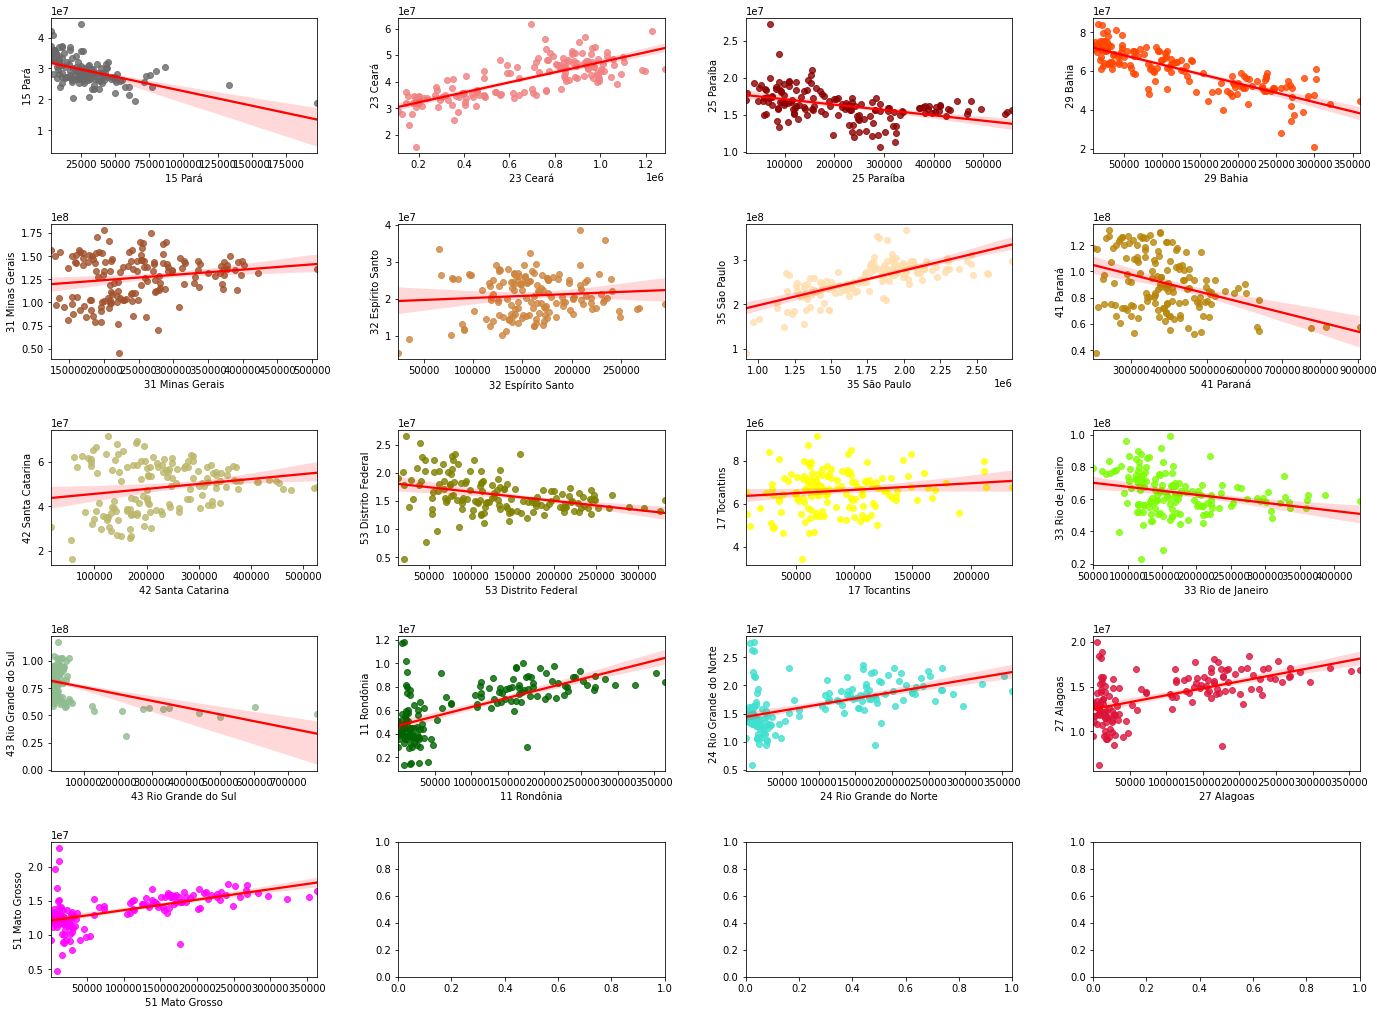

In [254]:
# Construindo gráficos de correlações entre gasto total e referente a acidentes
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(20,15)
fig.tight_layout(pad=5.0)

colors=[
        'dimgrey', 
        'lightcoral',
        'darkred',
        'orangered',
        'sienna',
        'peru',
        'navajowhite',
        'darkgoldenrod',
        'darkkhaki',
        'olive',
        'yellow',
        'lawngreen',
        'darkseagreen',
        'darkgreen',
        'turquoise',
        'crimson',
        'fuchsia'
        ]

x = 0
y = 0
color = 0
for estado in dados_selecionados.T.columns:
  sns.regplot(
      x=dados_selecionados.loc[estado], 
      y=totais_cortados.loc[estado], 
      scatter_kws={'color': colors[color]},
      line_kws={'color': 'red'},
      ax=axs[x, y]
      )
  y += 1
  color += 1
  if y > 3:
    y = 0
    x += 1

plt.show()

---
# Conclusão
Neste estudo foram analisados os dados extraídos com a ferramenta TABET da fonte pública denominada DATASUS. Os gastos totais com saúde pública dividido por unidade da federação no período de janeiro de 2008 a março de 2021, assim como gastos na saúde pública referentes a ocorrências de tráfego foram levados em consideração.

Foi necessária a utilização de um pré-processamento das bases com o intuito de eliminar trechos incompletos e preencher trechos com poucos lapsos de dados, utilizando um processo de interpolação linear. Após essa fase de pré-processamento, as duas bases se encontraram completas, abrangendo o mesmo período de tempo e unidades federativas.

As análises tiveram como objetivo mostrar a influência do gasto com saúde pública oriundo de ocorrências de tráfego no total de gastos com a mesma pasta de cada estado. Para tal, foram construídos gráficos que apresentavam o gasto total e aquele com acidentes em uma única tomada. Este tipo de gráfico apresentou a impossibilidade de se analisar os gastos com acidentes, uma vez que estes eram muito menores que o gasto total.

Em seguida, a análise se voltou para a visualização proporcional de quanto o gasto total era maior do que aquele com acidentes de trânsito. Para tanto, o valor total foi dividido pelo valor de acidentes e os gráficos de linhas foram construídos. Despertou interesse nas análises os eixos 'y's desses gráficos, por apresentarem uma escala de quantas vezes o gasto total era maior do que os gastos relacionados a acidentes.

Foi construída uma tabela de correlação com os dados de todos os estados selecionados, a qual serviu como base para a construção de todos os gráficos de correlação. A construção desses gráficos busca identificar a distribuição dos pontos e a linha de tendência. Pontos agrupados em formato de linha ascendente ou descendente mostra uma forte correlação entre os dados, quanto que pontos espalhados indica que as variáveis não estão correlacionadas.

Foram identificadas fortes correlações entre os gastos totais e aqueles relacionados a acidentes, o que já era esperado. Gastos com ocorrências de tráfego são uma parte dos gastos totais com saúde pública. No entanto, foram encontradas correlações negativas em alguns estados, o que causa estranhesa. Afinal, como os gastos totais diminuiriam conforme os gastos com ocorrências de tráfego aumentam?

A conclusão retirada dos gráficos de proporção e correlação é que: Os gastos em saúde pública oriundos de acidentes de tráfego não são significativos para os gastos totais com saúde pública. Uma segunda hipótese levantada durante a visualização dos gráficos de gastos com saúde pública devido a acidentes, é que os estados podem subnotificar estes gastos. No caso de um estado não classificar um gasto, automaticamente implica em adicioná-lo ao total e indicando ele como não sendo devido a um acidente de tráfego. Essa falta de classificação repetida por meses, pode impactar diretamente as análises.

Resumo:
* De 17 estados analisados, em 10 estados o gasto total com saúde pública aumenta com o gasto em acidentes.
* De 17 estados analisados, em 7 estados essa proporção é a inversa do item anterior.
* Os gastos com acidentes são muito menores que o gasto total com saúde pública.
* Há a probabilidade de se ter subnotificação de gastos em saúde pública referentes a acidentes de trânsito.

---